In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file
data=pd.read_csv('wine_quality.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


from dataset we can see 1599 rows and 12 columns

In [3]:
#describing Dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


no missing data, too much outliers are present in columns like chlorides,density,pH.

In [4]:
#Columns in dataset
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Unique classes in target column
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

class ranges from 3 to 8 in th dataset

In [8]:
#Count the values present in target column
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [9]:
# Libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='count'>

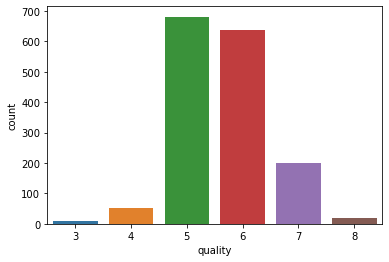

In [10]:
# visualizing Target column
sns.countplot(x='quality', data=data)

In [11]:
# New column "Review"
# 1 - for good quality of wine
# 0 - for not a good quality

# Qulity rating 1 to 6 -->Under not a good wine
# Quality rating 7 to 10 --> Under good wine category
# Create an empty list called Reviews
new = []
for i in data['quality']:
    if i >= 1 and i < 7:
        new.append('0')
    elif i >= 7 and i <= 10:
        new.append('1')
data['Reviews'] = new
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


<AxesSubplot:xlabel='Reviews', ylabel='count'>

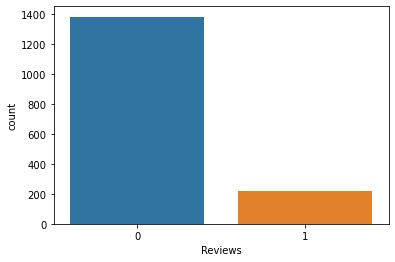

In [12]:
# visualization for good wine quality and not a good wine quality
sns.countplot(x='Reviews', data=data)

In [13]:
# correlation with target column quality
data.corr()['quality'].abs().sort_values(ascending=True)

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

residual sugar showing less correlation with quality

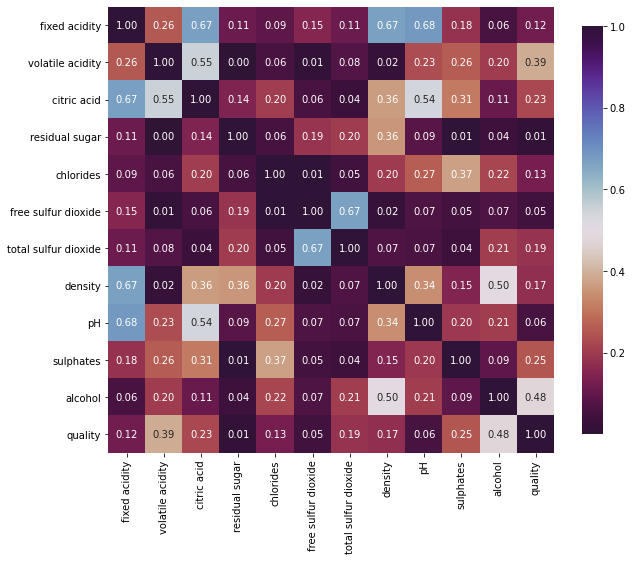

In [14]:
# multivariate analysis
# visualization of correlation with each other and with target column
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(),square=True,fmt='.2f',cbar=True,cbar_kws={'shrink':.75},annot=True,annot_kws={'size':10},cmap='twilight_shifted_r')
plt.show()

###### univariate analysis

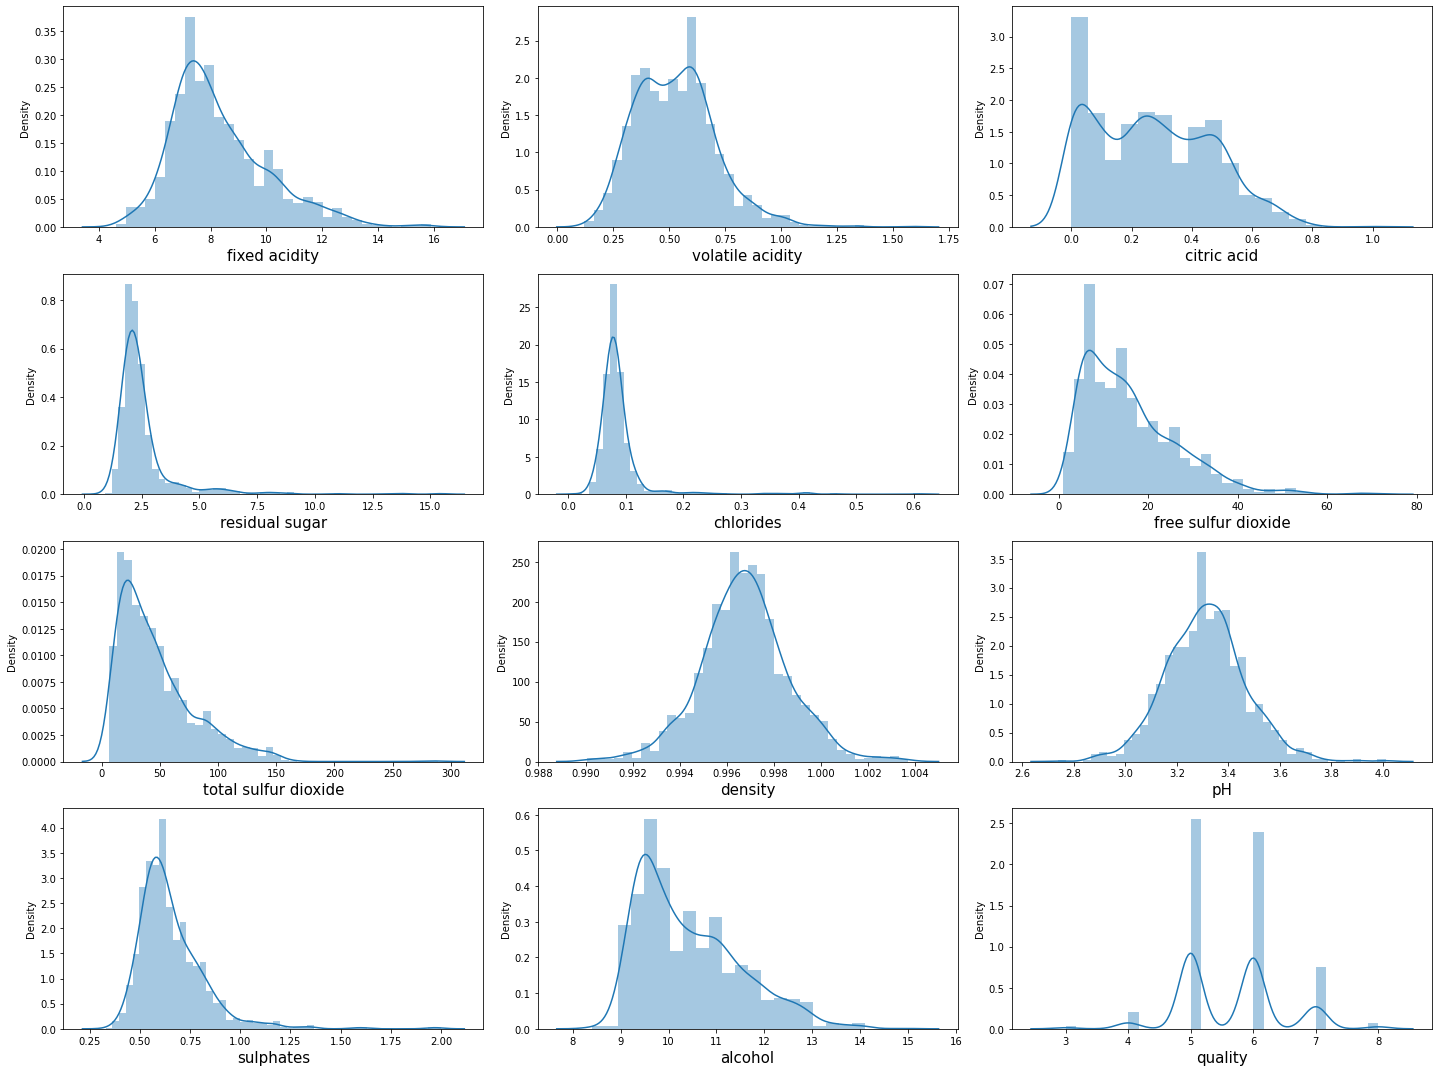

In [15]:
# univariate analysis
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

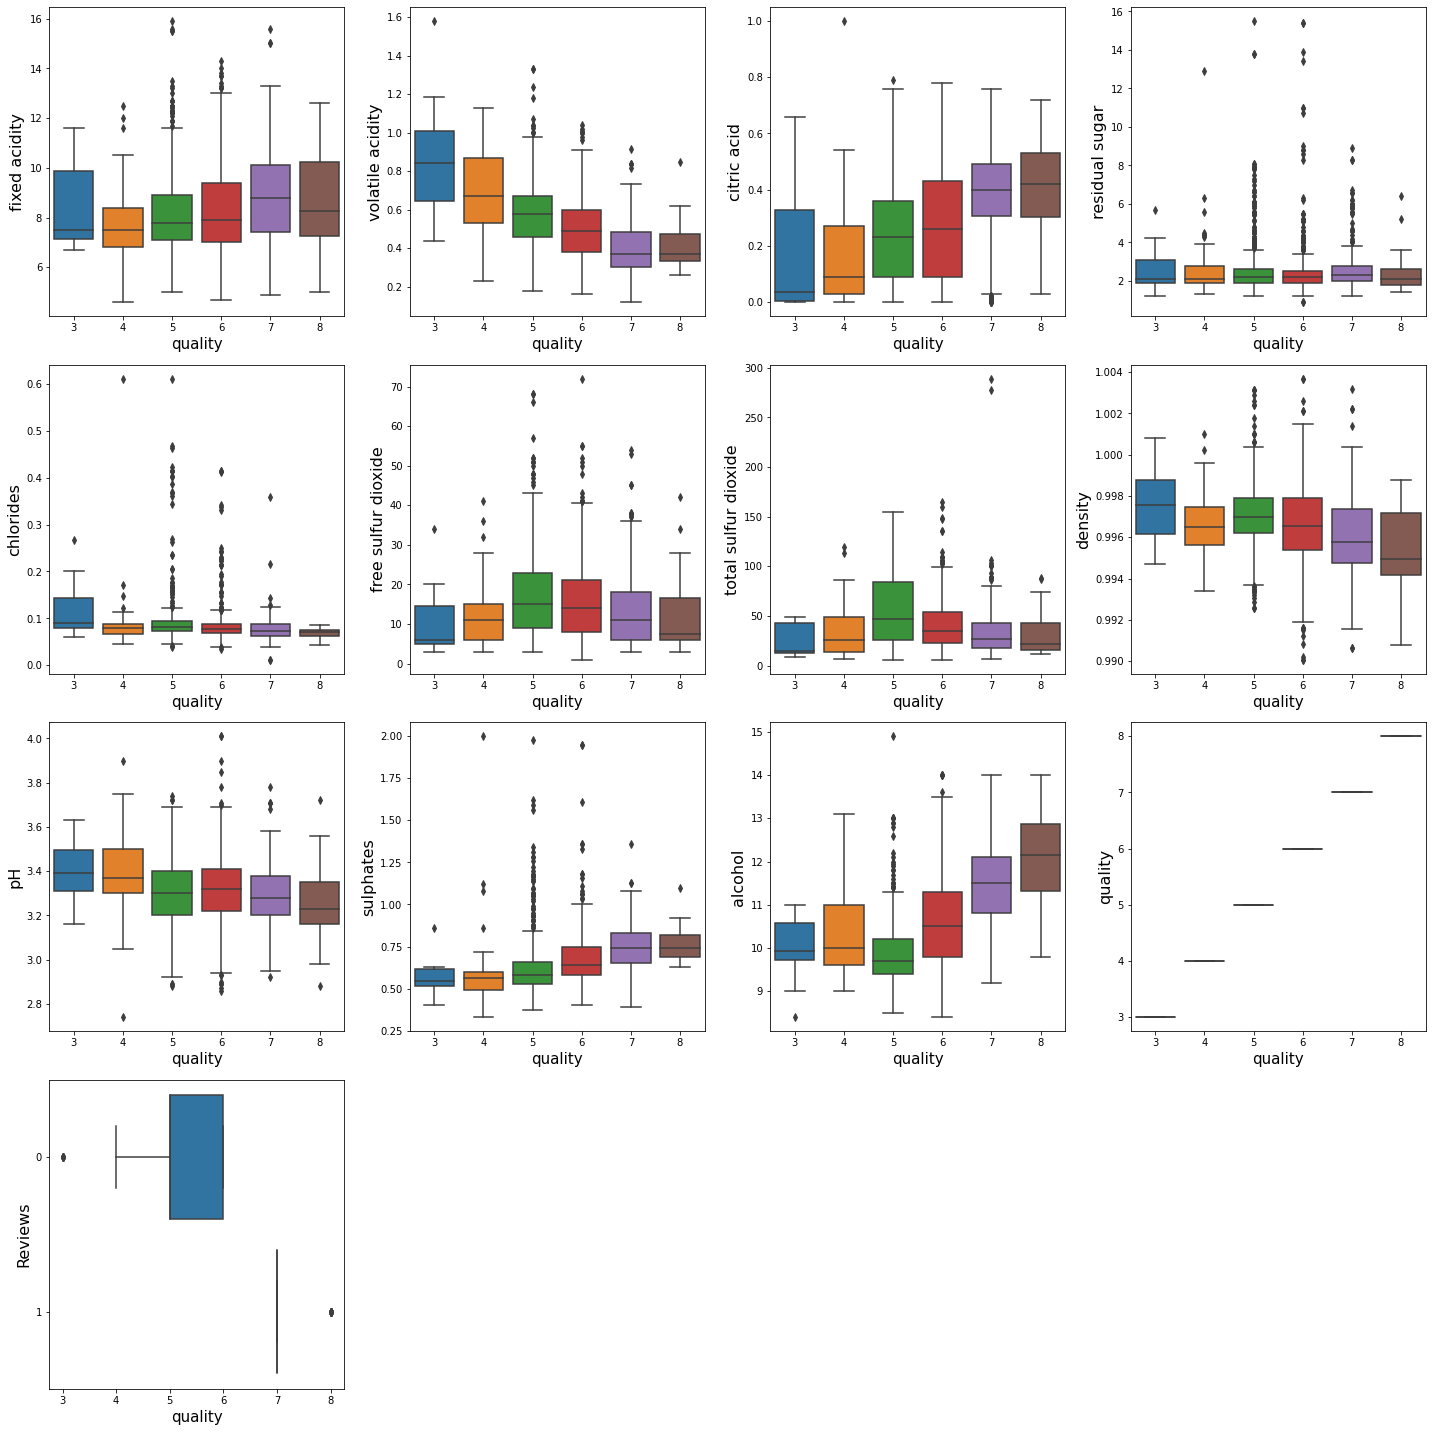

In [16]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data.quality,data[i])
        plt.xlabel('quality',fontsize=15)
        plt.ylabel(i,fontsize=16)
    plotnumber+=1
plt.tight_layout()
plt.show()

###### outliers removing and visualization


In [17]:
# removing outlier and skewness using Quantile technique

q=data['fixed acidity'].quantile(.99)
cleaned_data=data[data['fixed acidity']<q]

q=cleaned_data['volatile acidity'].quantile(.98)
cleaned_data=cleaned_data[cleaned_data['volatile acidity']<q]

q=cleaned_data['citric acid'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['citric acid']<q]

q=cleaned_data['residual sugar'].quantile(.98)
cleaned_data=cleaned_data[cleaned_data['residual sugar']<q]

q=cleaned_data['chlorides'].quantile(.98)
cleaned_data=cleaned_data[cleaned_data['chlorides']<q]

q=cleaned_data['free sulfur dioxide'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['free sulfur dioxide']<q]

q=cleaned_data['total sulfur dioxide'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['total sulfur dioxide']<q]

q=cleaned_data['density'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['density']<q]

q=cleaned_data['pH'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['pH']<q]

q=cleaned_data['sulphates'].quantile(.98)
cleaned_data=cleaned_data[cleaned_data['sulphates']<q]

q=cleaned_data['alcohol'].quantile(.99)
cleaned_data=cleaned_data[cleaned_data['alcohol']<q]

In [18]:
cleaned_data.shape

(1359, 13)

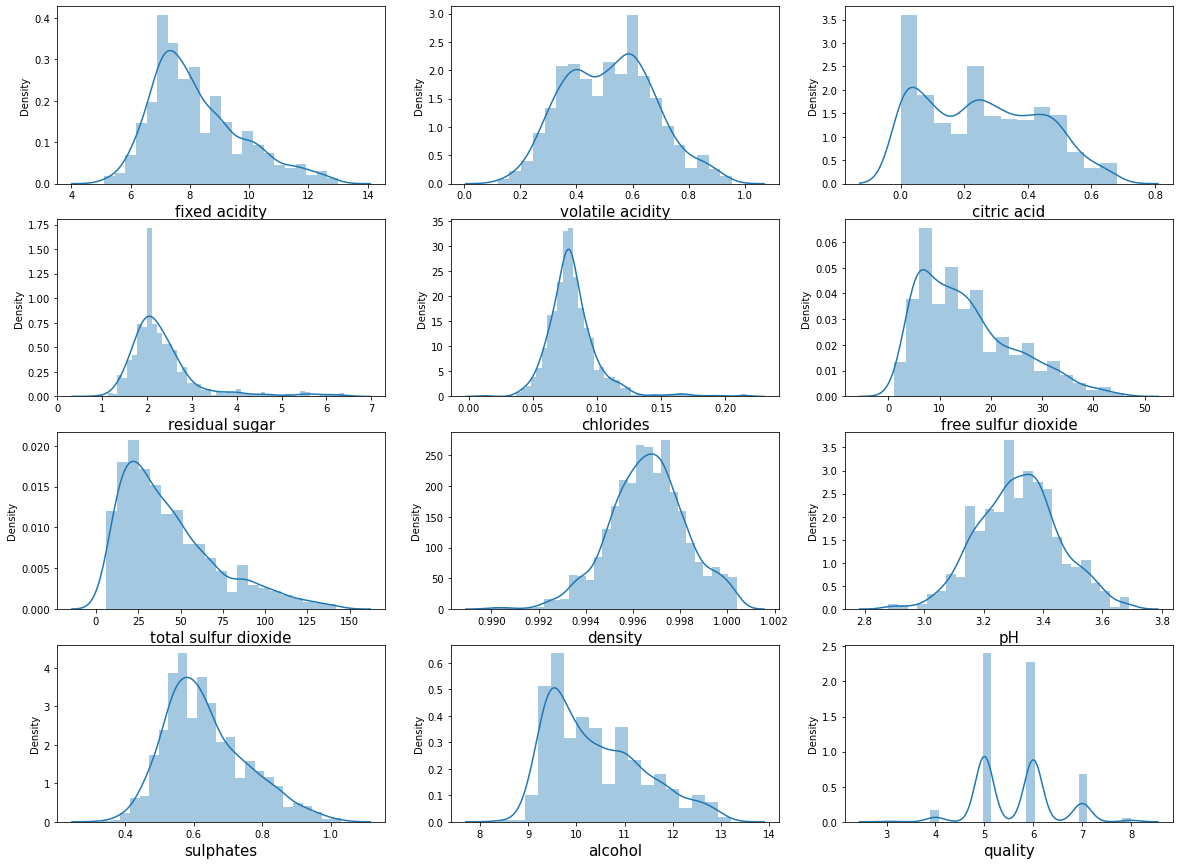

In [19]:
# visualization 
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in cleaned_data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(cleaned_data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [20]:
# Library for feature selection
from sklearn.feature_selection import SelectKBest,f_classif

In [21]:
# splitting the dataset 
x=cleaned_data.drop(['quality','Reviews'],axis=1) 
y=cleaned_data.Reviews

# feature selection
feature=SelectKBest(score_func=f_classif,k=7)
fit=feature.fit(x,y)
data_score=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

# concat dataframe 
feature_score=pd.concat([data_columns,data_score],axis=1)
feature_score.columns=['feature_name','score']
print(feature_score.nlargest(7,'score'))

            feature_name       score
10               alcohol  287.442248
9              sulphates  125.219693
1       volatile acidity  103.868009
2            citric acid   63.548038
7                density   49.580802
6   total sulfur dioxide   39.337009
4              chlorides   18.837912


after feature selection we can say that columns -> pH,free sulfur dioxide,residual sugar have less contribution. we can drop these columns.

In [22]:
# dropping columns 
x_new=x.drop(['residual sugar','pH','free sulfur dioxide'],axis=1)
x_new.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: Reviews, Length: 1359, dtype: object

###### standardization

In [24]:
# Library for standardization
from sklearn.preprocessing import StandardScaler

In [25]:
# scaling new data 
scaler=StandardScaler() 
x_scales=scaler.fit_transform(x_new)

###### finding best random state

In [26]:
# Libraries for model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Libraries for model selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 

In [27]:
# finding best random state
max_=0
maxr=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scales,y,test_size=.25,random_state=i) # passed non scaled data because in decisiontree there is no need of scale data
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>max_:
        max_=acc
        maxr=i
print('max accuracy score:',max_,'\nmax random state:',maxr)

max accuracy score: 0.9294117647058824 
max random state: 26


we got our best random state 

In [28]:
# train test split for best random state
x_train,x_test,y_train,y_test=train_test_split(x_scales,y,test_size=.25,random_state=26)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1019, 8), (1019,), (340, 8), (340,))

###### applying models

In [29]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result by LogisticRegression')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by LogisticRegression

accuracy score: 0.9294117647058824

classification report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96       301
           1       0.86      0.46      0.60        39

    accuracy                           0.93       340
   macro avg       0.90      0.73      0.78       340
weighted avg       0.93      0.93      0.92       340

confusioon matrix:
 [[298   3]
 [ 21  18]]


In [30]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Result by Decision Tree Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by Decision Tree Classifier

accuracy score: 0.8794117647058823

classification report:

               precision    recall  f1-score   support

           0       0.95      0.92      0.93       301
           1       0.48      0.59      0.53        39

    accuracy                           0.88       340
   macro avg       0.71      0.75      0.73       340
weighted avg       0.89      0.88      0.88       340

confusioon matrix:
 [[276  25]
 [ 16  23]]


In [31]:

# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print('Result by KNeighbors Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by KNeighbors Classifier

accuracy score: 0.8911764705882353

classification report:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       301
           1       0.53      0.46      0.49        39

    accuracy                           0.89       340
   macro avg       0.73      0.70      0.72       340
weighted avg       0.89      0.89      0.89       340

confusioon matrix:
 [[285  16]
 [ 21  18]]


In [32]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Result by Support Vector Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by Support Vector Classifier

accuracy score: 0.9147058823529411

classification report:

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       301
           1       0.92      0.28      0.43        39

    accuracy                           0.91       340
   macro avg       0.92      0.64      0.69       340
weighted avg       0.91      0.91      0.89       340

confusioon matrix:
 [[300   1]
 [ 28  11]]


In [33]:

# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Result by RandomForest Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by RandomForest Classifier

accuracy score: 0.9235294117647059

classification report:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       301
           1       0.71      0.56      0.63        39

    accuracy                           0.92       340
   macro avg       0.83      0.77      0.79       340
weighted avg       0.92      0.92      0.92       340

confusioon matrix:
 [[292   9]
 [ 17  22]]


In [34]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
print('Result by AdaBoost Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by AdaBoost Classifier

accuracy score: 0.888235294117647

classification report:

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       301
           1       0.51      0.46      0.49        39

    accuracy                           0.89       340
   macro avg       0.72      0.70      0.71       340
weighted avg       0.88      0.89      0.89       340

confusioon matrix:
 [[284  17]
 [ 21  18]]


###### appling cross validation

In [35]:
# try to improve accuracy through cross validation  
m=[lr,dtc,knc,svc,rfc,abc] #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x_scales,y,cv=15)
    print(i)
    print('cross validation score:',scr_.mean(),'\n')

LogisticRegression()
cross validation score: 0.8837037037037038 

DecisionTreeClassifier()
cross validation score: 0.8093121693121693 

KNeighborsClassifier()
cross validation score: 0.8726332926332928 

SVC()
cross validation score: 0.888864468864469 

RandomForestClassifier()
cross validation score: 0.8845095645095645 

AdaBoostClassifier()
cross validation score: 0.8659910459910461 



###### roc auc plot

In [36]:
# testing all models
lr.score(x_test,y_test)
dtc.score(x_test,y_test)
knc.score(x_test,y_test)
svc.score(x_test,y_test)
rfc.score(x_test,y_test)
abc.score(x_test,y_test)
print('all model test score captured')

all model test score captured


In [37]:
# Library for metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve 

In [38]:
 # roc_auc_score for LogisticRegression()
roc_auc_score(y_test,lr.predict(x_test))

0.7257858420649119

In [39]:
# roc_auc_score for DecisionTreeClassifier()
roc_auc_score(y_test,dtc.predict(x_test)) 

0.7533435556691371

In [40]:
# roc_auc_score for KNeighborsClassifier()
roc_auc_score(y_test,knc.predict(x_test)) 

0.7041911576795298

In [41]:
 # roc_auc_score for SVC()
roc_auc_score(y_test,svc.predict(x_test))

0.6393645114575347

In [42]:
# roc_auc_score for RandomForestClassifier()
roc_auc_score(y_test,rfc.predict(x_test))

0.7671011159383252

In [43]:
# roc_auc_score for AdaBoostClassifier()
roc_auc_score(y_test,abc.predict(x_test)) 

0.7025300281114235

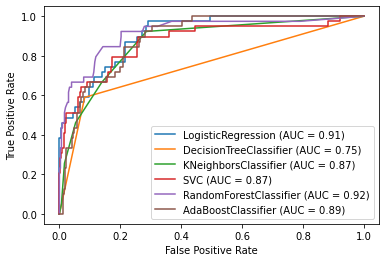

In [44]:
# comparing models
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

###### Hyperparameter Tuning

In [45]:
# SVC model has the least differnce  
#hyperparameter tuning for svc
parameters={'kernel':['linear','poly','sigmoidal'],
           'gamma':['auto','float']}

gs=GridSearchCV(svc,parameters)
gs.fit(x_train,y_train)
print('\nSupport Vector Classifier Hyperparameter Tuning')
print('best estimators:\n',gs.best_estimator_)

 # applying best estimators
new_model=gs.best_estimator_
new_model.fit(x_train,y_train)
pred=new_model.predict(x_test)
print('\n\naccuracy score:',accuracy_score(y_test,pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,pred))
print('\nclassification_report:\n',pd.DataFrame(classification_report(y_test,pred,output_dict=True)))


Support Vector Classifier Hyperparameter Tuning
best estimators:
 SVC(gamma='auto', kernel='poly')


accuracy score: 0.9147058823529411

confusion_matrix:
 [[295   6]
 [ 23  16]]

classification_report:
                     0          1  accuracy   macro avg  weighted avg
precision    0.927673   0.727273  0.914706    0.827473      0.904686
recall       0.980066   0.410256  0.914706    0.695161      0.914706
f1-score     0.953150   0.524590  0.914706    0.738870      0.903992
support    301.000000  39.000000  0.914706  340.000000    340.000000


In [46]:
# RFC model has the maximum area    
#hyperparameter tuning for rfc
parameters={'n_estimators':[5,12,17,19], 
    'criterion':['entropy','gini'],
    'max_depth':[8],
    'min_samples_split':[7,8],
    'min_samples_leaf':[4,5]}

gs=GridSearchCV(rfc,parameters)
gs.fit(x_train,y_train)
print('\nRandomForest Classifier Hyperparameter Tuning')
print('best estimators:\n',gs.best_estimator_)

# Applying best estimator
my_model=gs.best_estimator_ 
my_model.fit(x_train,y_train)
pred=my_model.predict(x_test)
print('\n\naccuracy score:',accuracy_score(y_test,pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,pred))
print('\nclassification_report:\n',pd.DataFrame(classification_report(y_test,pred,output_dict=True)))


RandomForest Classifier Hyperparameter Tuning
best estimators:
 RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=19)


accuracy score: 0.9058823529411765

confusion_matrix:
 [[293   8]
 [ 24  15]]

classification_report:
                     0          1  accuracy   macro avg  weighted avg
precision    0.924290   0.652174  0.905882    0.788232      0.893077
recall       0.973422   0.384615  0.905882    0.679019      0.905882
f1-score     0.948220   0.483871  0.905882    0.716046      0.894956
support    301.000000  39.000000  0.905882  340.000000    340.000000


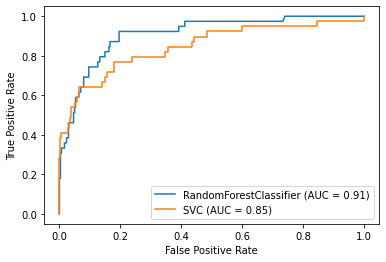

In [47]:
disp=plot_roc_curve(my_model,x_test,y_test)
plot_roc_curve(new_model,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [48]:
#saving the final model
import pickle
filename='red_wine_best.pkl'
pickle.dump(my_model,open(filename,'wb'))